In [1]:
!pip install tensorflow

In [2]:
import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,r2_score


import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
#from keras.utils import np_utils
import itertools
from keras.layers import LSTM
#from keras.layers.convolutional import Conv1D
#from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Checkpoint_count = pd.read_excel('Checkpoint_count.xlsx')
Checkpoint_count.head(-5)

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2015-06-11 00:00:00,00:00:00,2613,1477,2334,1025,NaN,177,879,853,...,701.0,2130,2675,1016,271,4522.0,1205,1430,2234,309
310,2015-07-11 00:00:00,00:00:00,1879,1481,1838,595,NaN,343,606,593,...,707.0,1719,2251,590,120,2688.0,923,1215,1163,124
311,2015-08-11 00:00:00,00:00:00,1240,1254,1470,514,NaN,151,452,436,...,566.0,1301,1920,367,79,2302.0,704,989,812,95
312,2015-09-11 00:00:00,00:00:00,2972,1855,2857,1327,NaN,44,1076,1043,...,1055.0,2370,3005,1226,321,4057.0,1500,1376,2758,377


In [4]:
weather = pd.read_excel('weather.xlsx')
weather.head(-5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
2,2015-01-01 00:00:00,2015,1,1,‡,-3,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0,NaN,22,NaN,63,NaN
3,2015-01-02 00:00:00,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0,T,0,T,1,NaN,27,NaN,50,NaN
4,2015-01-03 00:00:00,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17,NaN,17,NaN,1,NaN,3,NaN,41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2015-12-22 00:00:00,2015,12,22,‡,4.6,NaN,1,NaN,2.8,...,0,NaN,4.2,NaN,NaN,NaN,NaN,NaN,<31,NaN
358,2015-12-23 00:00:00,2015,12,23,‡,10.7,NaN,1.6,NaN,6.2,...,0,NaN,6.6,NaN,NaN,NaN,3,NaN,39,NaN
359,2015-12-24 00:00:00,2015,12,24,‡,16.9,NaN,5.2,NaN,11.1,...,0,NaN,2.2,NaN,NaN,NaN,24,NaN,98,NaN
360,2015-12-25 00:00:00,2015,12,25,‡,7.6,NaN,1,NaN,4.3,...,0,NaN,0,T,NaN,NaN,NaN,NaN,<31,NaN


In [5]:
weather = weather.drop(weather.index[0])

In [6]:
weather.columns = weather.iloc[0]
weather = weather.iloc[1:]


In [7]:
weather = weather.reset_index()
weather.head()

1,index,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2,2015-01-01 00:00:00,2015,1,1,‡,-3,NaN,-7.6,NaN,...,1.8,NaN,1.8,NaN,0,NaN,22,NaN,63,NaN
1,3,2015-01-02 00:00:00,2015,1,2,‡,-3.4,NaN,-14.2,NaN,...,0,T,0,T,1,NaN,27,NaN,50,NaN
2,4,2015-01-03 00:00:00,2015,1,3,‡,-8.5,NaN,-17.7,NaN,...,17,NaN,17,NaN,1,NaN,3,NaN,41,NaN
3,5,2015-01-04 00:00:00,2015,1,4,‡,3,NaN,-8.6,NaN,...,0.4,NaN,27.2,NaN,8,NaN,26,NaN,69,NaN
4,6,2015-01-05 00:00:00,2015,1,5,‡,-5.3,NaN,-17.9,NaN,...,0,T,0,T,6,NaN,27,NaN,74,NaN


In [8]:
weather.columns

Index(['index', 'Date/Time', 'Year', 'Month', 'Day', 'Data Quality',
       'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag',
       'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)',
       'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag',
       'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag',
       'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object', name=1)

In [9]:
weather.drop('index', axis=1, inplace=True)

In [10]:
weather.shape

(365, 27)

In [11]:
Checkpoint_count.shape

(319, 23)

In [12]:
print(Checkpoint_count.check_point4.isnull().value_counts(normalize = True))
print(Checkpoint_count.check_point9.isnull().value_counts(normalize = True))
print(Checkpoint_count.check_point11.isnull().value_counts(normalize = True))
print(Checkpoint_count.check_point16.isnull().value_counts(normalize = True))

True     0.805643
False    0.194357
Name: check_point4, dtype: float64
True     0.836991
False    0.163009
Name: check_point9, dtype: float64
False    0.655172
True     0.344828
Name: check_point11, dtype: float64
True     0.84326
False    0.15674
Name: check_point16, dtype: float64


In [13]:
# Checkpoint 4, 9, 16 have more than 80% of missing data. Hence, these features are dropped.
# Null entries of Checkpoint 11 are 34%. Hence, checkpoint11 feature is dropped.

Checkpoint_count = Checkpoint_count.drop('check_point4', axis=1)
Checkpoint_count = Checkpoint_count.drop('check_point9', axis=1)
Checkpoint_count = Checkpoint_count.drop('check_point16', axis=1)
Checkpoint_count = Checkpoint_count.drop('check_point11', axis=1)


In [14]:
Checkpoint_count = Checkpoint_count.drop(['Date', 'Time'], axis=1)

In [15]:
# Target variable is sum of all cycles in a city.

In [16]:
Checkpoint_count['Total'] = 0
for i in range(Checkpoint_count.shape[0]):
    sum = 0
    for j in range(17):
        sum = sum + Checkpoint_count.iloc[i,j]
    Checkpoint_count['Total'][i]= sum
    
Checkpoint_count.head()

,check_point0,check_point1,check_point2,check_point3,check_point5,check_point6,check_point7,check_point8,check_point10,check_point12,check_point13,check_point14,check_point15,check_point17,check_point18,check_point19,check_point20,Total
0,58,12,4,17,49,21,16,16,7,58,91,24,3,17,78,21,6,498
1,75,7,5,15,113,27,9,32,11,109,177,32,13,11,57,77,4,774
2,79,7,3,7,107,36,12,18,2,71,131,33,5,14,174,40,5,744
3,10,1,21,0,35,29,1,0,0,6,11,6,1,1,20,6,0,148
4,42,0,2,0,90,21,1,1,6,0,5,49,20,0,41,56,10,344


In [17]:
# Total is sum of all the rented cycles at all checkpoints within a city.

In [18]:
weather['Total'] = Checkpoint_count['Total']

# Weather Data Null value treatment

In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date/Time                  365 non-null    object 
 1   Year                       365 non-null    object 
 2   Month                      365 non-null    object 
 3   Day                        365 non-null    object 
 4   Data Quality               365 non-null    object 
 5   Max Temp (°C)              365 non-null    object 
 6   Max Temp Flag              0 non-null      object 
 7   Min Temp (°C)              365 non-null    object 
 8   Min Temp Flag              1 non-null      object 
 9   Mean Temp (°C)             365 non-null    object 
 10  Mean Temp Flag             1 non-null      object 
 11  Heat Deg Days (°C)         365 non-null    object 
 12  Heat Deg Days Flag         1 non-null      object 
 13  Cool Deg Days (°C)         365 non-null    object 

In [20]:
w1 = weather.copy()

Imbalanced features where one of the class has less than 1% of total number of records are dropped.

In [21]:
weather = weather.drop(['Max Temp Flag','Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag','Cool Deg Days Flag','Snow on Grnd Flag', 'Dir of Max Gust Flag','Spd of Max Gust Flag'], axis=1)

Date/Time feature does not add value to the analysis. So, it is stored in Series and removed from the dataframe 'weather'.

In [22]:
date_time = weather['Date/Time']

In [23]:
weather.drop(['Year','Date/Time'], axis=1, inplace=True)

In [24]:
#Day also do not add significant information to the analysis.
Day = weather['Day']
weather.drop(['Day'], axis=1, inplace=True)

In [25]:
weather.drop(['Month','Data Quality'], axis=1, inplace=True)

In [26]:
from warnings import filterwarnings 
filterwarnings('ignore')

In [27]:
weather[['Max Temp (°C)', 'Min Temp (°C)','Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)']]= weather[['Max Temp (°C)', 'Min Temp (°C)','Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)']].astype(float)

In [28]:
#Logically there are high chances that amount of rain on consecutive days is nearly equal. So, forward fill method is used.

In [29]:
weather['Total Rain (mm)']=weather['Total Rain (mm)'].fillna(method='ffill')

In [30]:
weather['Total Rain Flag'].value_counts(normalize=True)

T    0.697674
M    0.302326
Name: Total Rain Flag, dtype: float64

For the records where no flag was raised, we have filled such null values with 'N'.

In [31]:
weather['Total Rain Flag'] = weather['Total Rain Flag'].fillna('N')
weather['Total Snow Flag'] = weather['Total Snow Flag'].fillna('N')
weather['Total Precip Flag'] = weather['Total Precip Flag'].fillna('N')


In [32]:
weather['Total Snow (cm)'] = weather['Total Snow (cm)'].astype(float)

In [33]:
weather['Total Snow (cm)']=weather['Total Snow (cm)'].fillna(method='ffill')

In [34]:
weather['Total Precip (mm)'] = weather['Total Precip (mm)'].astype(float)

In [35]:
weather[['Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)']] = weather[['Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)']].astype(float)

In [36]:
weather['Snow on Grnd (cm)']= weather['Snow on Grnd (cm)'].fillna(0)

In [37]:
weather['Dir of Max Gust (10s deg)'] = weather['Dir of Max Gust (10s deg)'].fillna(np.mean(weather['Dir of Max Gust (10s deg)']))

In [38]:
weather['Spd of Max Gust (km/h)']=weather['Spd of Max Gust (km/h)'].fillna(method='ffill')

In [39]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Max Temp (°C)              365 non-null    float64
 1   Min Temp (°C)              365 non-null    float64
 2   Mean Temp (°C)             365 non-null    float64
 3   Heat Deg Days (°C)         365 non-null    float64
 4   Cool Deg Days (°C)         365 non-null    float64
 5   Total Rain (mm)            365 non-null    float64
 6   Total Rain Flag            365 non-null    object 
 7   Total Snow (cm)            365 non-null    float64
 8   Total Snow Flag            365 non-null    object 
 9   Total Precip (mm)          355 non-null    float64
 10  Total Precip Flag          365 non-null    object 
 11  Snow on Grnd (cm)          365 non-null    float64
 12  Dir of Max Gust (10s deg)  365 non-null    float64
 13  Spd of Max Gust (km/h)     365 non-null    object 

In [40]:
weather['Spd of Max Gust (km/h)']= weather['Spd of Max Gust (km/h)'].replace('<31', 30)
weather['Spd of Max Gust (km/h)'] = weather['Spd of Max Gust (km/h)'].astype(int)

In [41]:
weather.head(10)

1,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),Total
0,-3.0,-7.6,-5.3,23.3,0.0,0.0,N,1.8,N,1.8,N,0.0,22.0,63,498.0
1,-3.4,-14.2,-8.8,26.8,0.0,0.0,N,0.0,T,0.0,T,1.0,27.0,50,774.0
2,-8.5,-17.7,-13.1,31.1,0.0,0.0,N,17.0,N,17.0,N,1.0,3.0,41,744.0
3,3.0,-8.6,-2.8,20.8,0.0,26.8,N,0.4,N,27.2,N,8.0,26.0,69,148.0
4,-5.3,-17.9,-11.6,29.6,0.0,0.0,N,0.0,T,0.0,T,6.0,27.0,74,344.0
5,-8.6,-19.1,-13.9,31.9,0.0,0.0,N,2.2,N,2.2,N,6.0,22.0,32,666.0
6,-9.0,-26.4,-17.7,35.7,0.0,0.0,N,3.8,N,3.8,N,8.0,29.0,48,637.0
7,-7.4,-27.5,-17.5,35.5,0.0,0.0,N,2.2,N,2.2,N,10.0,18.0,50,637.0
8,-6.1,-14.6,-10.4,28.4,0.0,0.0,N,2.6,N,2.6,N,12.0,22.0,57,676.0
9,-9.0,-13.4,-11.2,29.2,0.0,0.0,N,0.4,N,0.4,N,7.0,22.0,50,277.0


# EDA

Weather data has records of 365 days while checkpoint count is available for only 319 days. 
Hence weather data is splitted as df with 319 labelled records which will be used for train-test split.
Remaining unlabelled data will be used to analyze the performance of model on test case.

In [123]:
df = weather.iloc[0:319, :]
df1=df.copy()

In [167]:
df2 = weather.iloc[319:, :]

Univariate Analysis

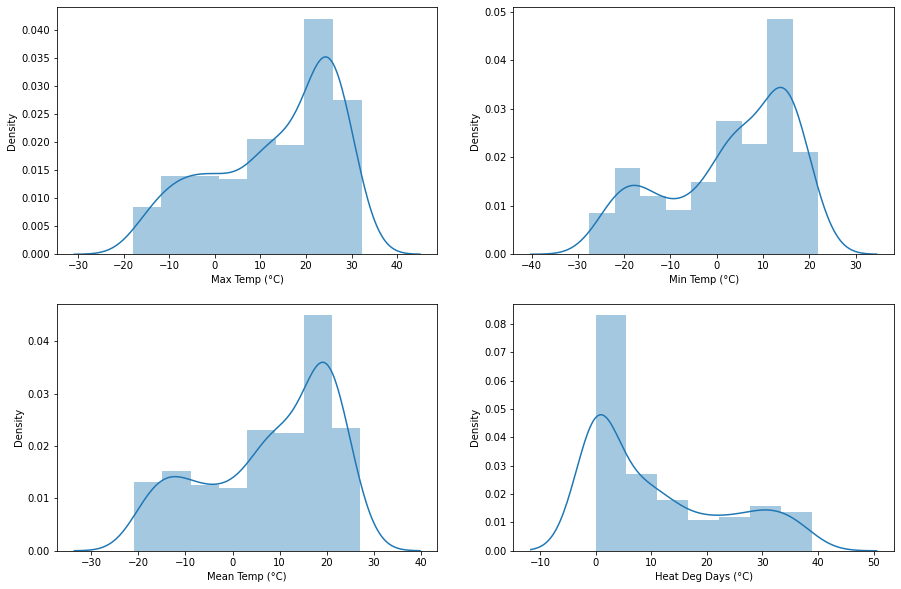

In [88]:
c2= ['Max Temp (°C)','Min Temp (°C)', 'Mean Temp (°C)','Heat Deg Days (°C)' ]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for var, subplot in zip(c2, ax.flatten()):
    sns.distplot(df[var], ax = subplot)
plt.show()

In [126]:
df_num = df.select_dtypes(include=np.number)
df_num.columns

Index(['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
       'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'Total'],
      dtype='object', name=1)

In [90]:
for i in df_num.columns:
    print(i, df_num[i].skew())

Max Temp (°C) -0.5894087310944884
Min Temp (°C) -0.6250579939594401
Mean Temp (°C) -0.6090442318257134
Heat Deg Days (°C) 0.7938409427037386
Cool Deg Days (°C) 2.0468000162111295
Total Rain (mm) 3.6051976411799562
Total Snow (cm) 5.736952482991949
Total Precip (mm) 3.465424583258426
Snow on Grnd (cm) 1.7245120029230798
Dir of Max Gust (10s deg) -1.0342647065205857
Spd of Max Gust (km/h) 0.8062189948589127
Total 0.11803289447259005


Bivariate Analysis

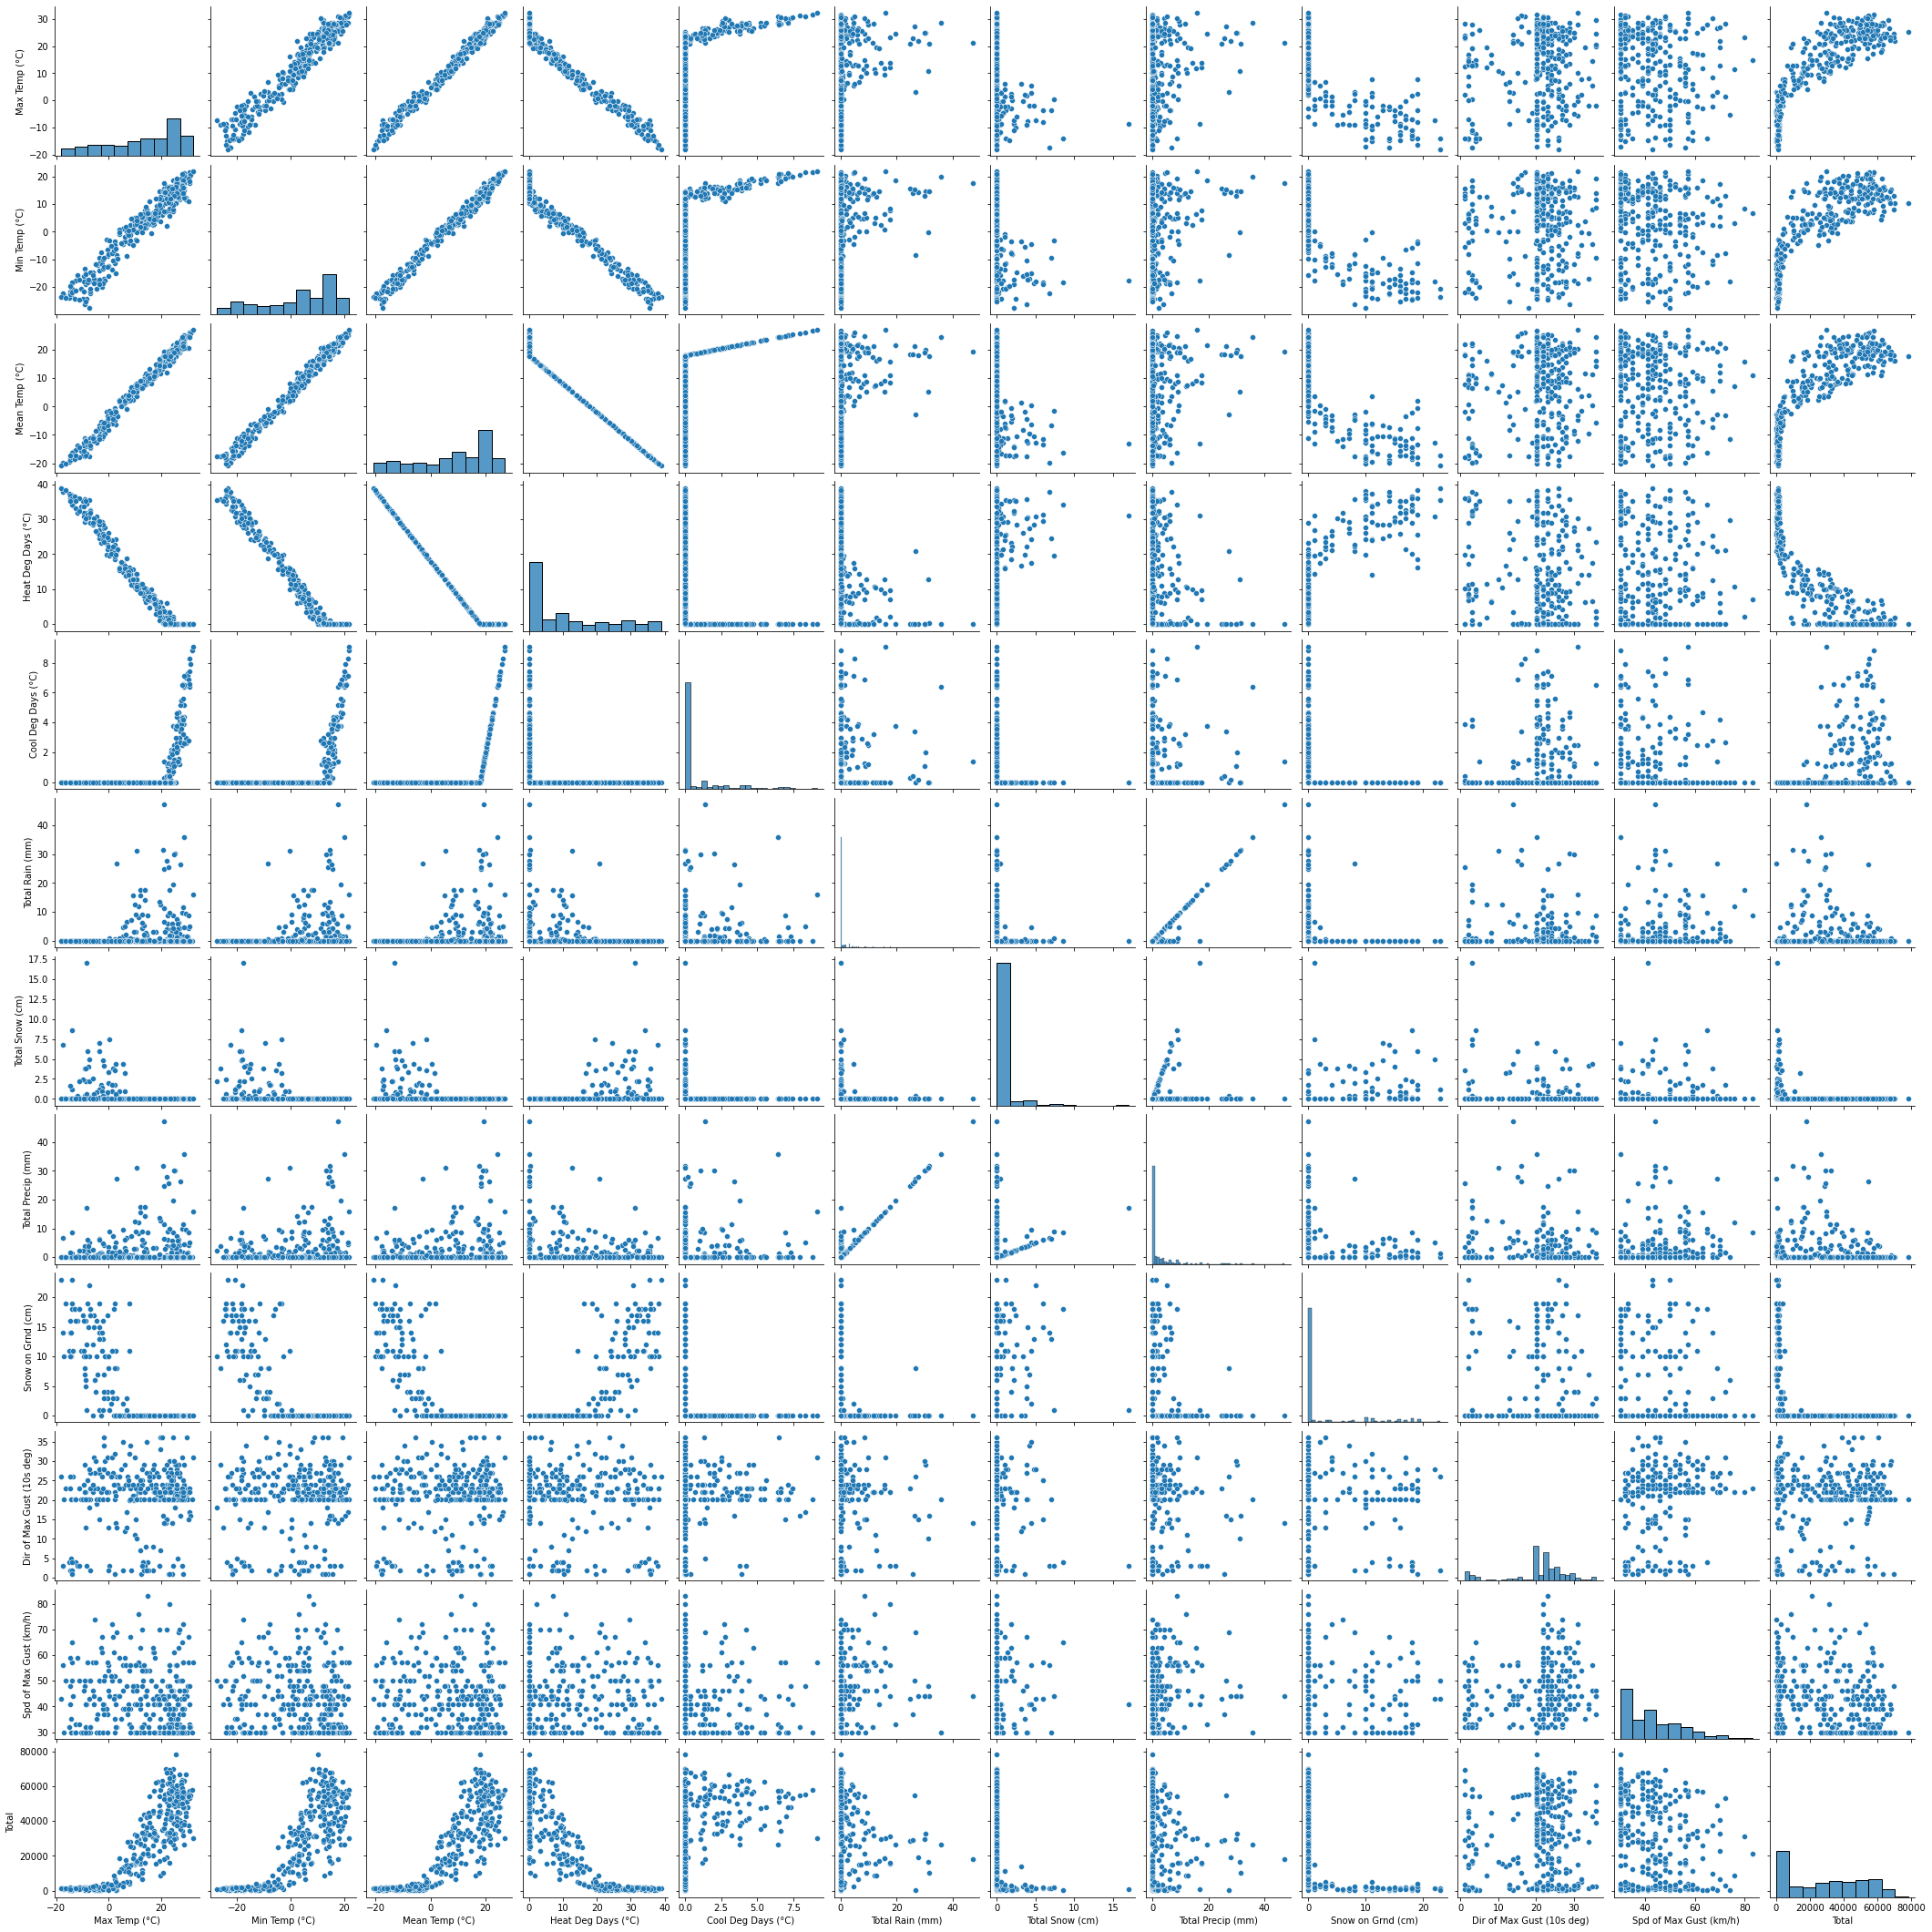

In [91]:
sns.pairplot(df_num)

In [92]:
df_cat= df.select_dtypes(include = [object])
df_cat.columns

Index(['Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag'], dtype='object', name=1)

Text(0, 0.5, 'Count of rented cycles')

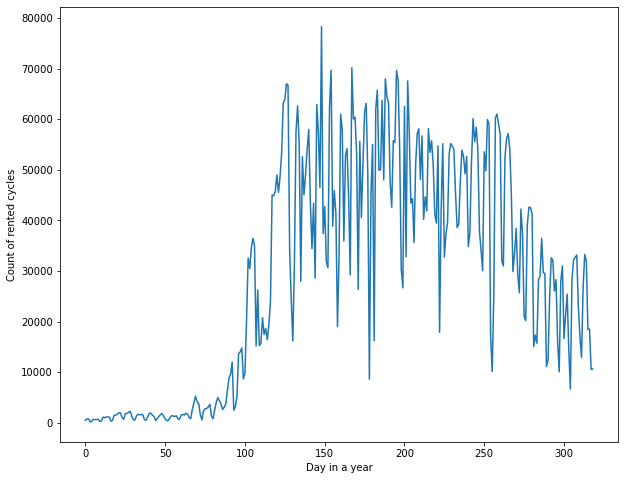

In [93]:
plt.plot(df['Total'])  
plt.xlabel('Day in a year')
plt.ylabel('Count of rented cycles')

In [94]:
#Degree days are the difference between the daily temperature mean, (high temperature plus low temperature divided by two) and 65°F.
#The heating requirements for a given building at a specific location are considered to be directly proportional to the number of HDD at that location.

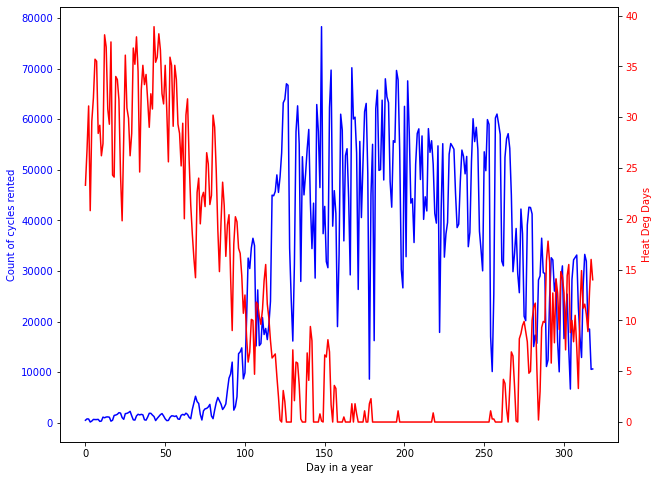

In [95]:
fig, ax1 = plt.subplots()
ax1.plot(df['Total'], color='blue') 
ax1.set_xlabel('Day in a year')
ax1.set_ylabel('Count of cycles rented', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(df['Heat Deg Days (°C)'], color='red') 
ax2.set_ylabel('Heat Deg Days', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

In [96]:
# Renting cycles increases significantly if heat degree days is in the range of 0 to 5 HDD.

Text(0, 0.5, 'Count of cycles rented')

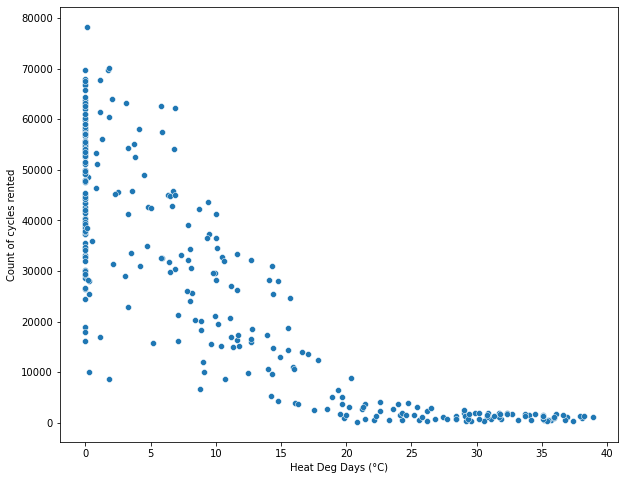

In [97]:
plt.rcParams["figure.figsize"]=[10,8]
sns.scatterplot( df['Heat Deg Days (°C)'],df['Total'])
plt.ylabel('Count of cycles rented')

In [98]:
#Renting of cycle reduces drastically if heat degree days exceeds 20 HDD.

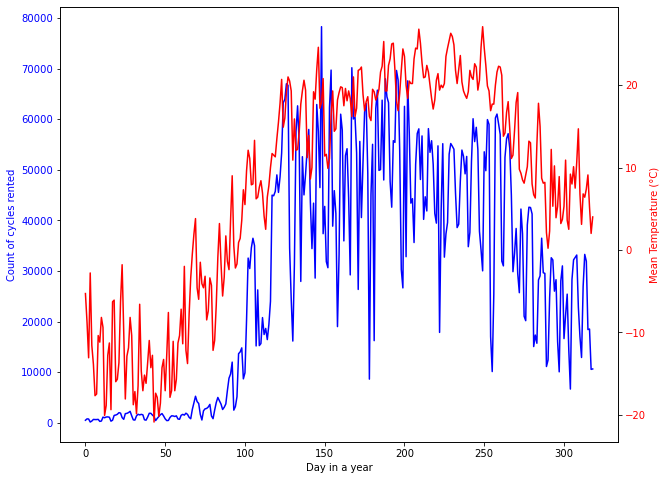

In [99]:
fig, ax1 = plt.subplots()
ax1.plot(df['Total'], color='blue') 
ax1.set_xlabel('Day in a year')
ax1.set_ylabel('Count of cycles rented', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(df['Mean Temp (°C)'], color='red') 
ax2.set_ylabel('Mean Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

In [100]:
#Renting of cycles is very low if mean temprature drops below 0 deg celcius.
#Customers avoid renting cycles in cold climate.

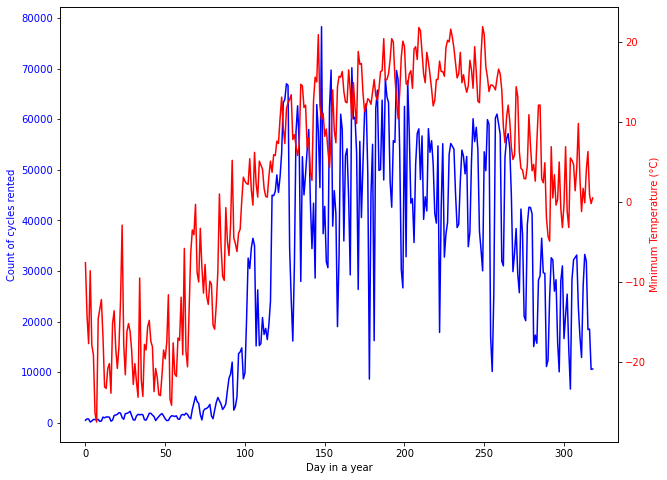

In [101]:
fig, ax1 = plt.subplots()
ax1.plot(df['Total'], color='blue') 
ax1.set_xlabel('Day in a year')
ax1.set_ylabel('Count of cycles rented', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(df['Min Temp (°C)'], color='red') 
ax2.set_ylabel('Minimum Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

In [102]:
#Count of rented cycles is highest when minimum temperature is between 15 to 20 deg celcius.

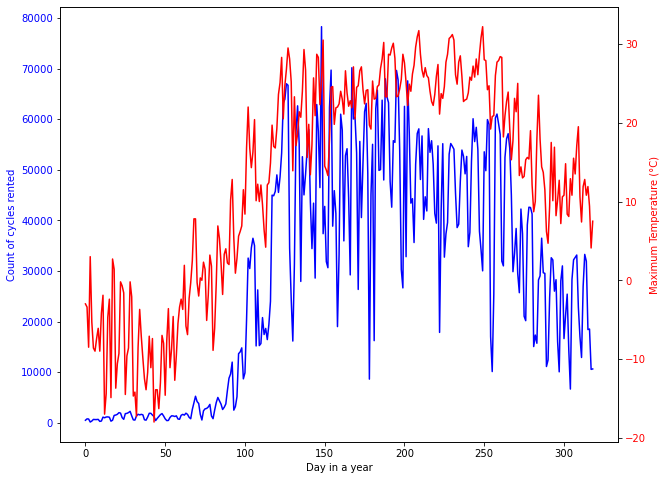

In [103]:
fig, ax1 = plt.subplots()
ax1.plot(df['Total'], color='blue') 
ax1.set_xlabel('Day in a year')
ax1.set_ylabel('Count of cycles rented', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(df['Max Temp (°C)'], color='red') 
ax2.set_ylabel('Maximum Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()

In [104]:
#Count of rented cycles is very low when maximum temperature is below -10 deg celcius.

In [105]:
c1= [ 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
       'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)']

In [106]:
#Effect of rain
# Customers are renting cycles even if it is raining (0 to 10 mm). 
# The count of rented cycles reduces drastically if rain exceeds 10 mm.


#Effect of snow on ground
# Customers tend to rent cycles only when roads are not covered with snow.
# For very less snow on the ground around 2 cm,customers do not rent cycles. Slippary roads could be the possible reason.


#Effect of gust speed
# Renting of cycles reduces when speed of maximum gust exceeds 60 km/hr.

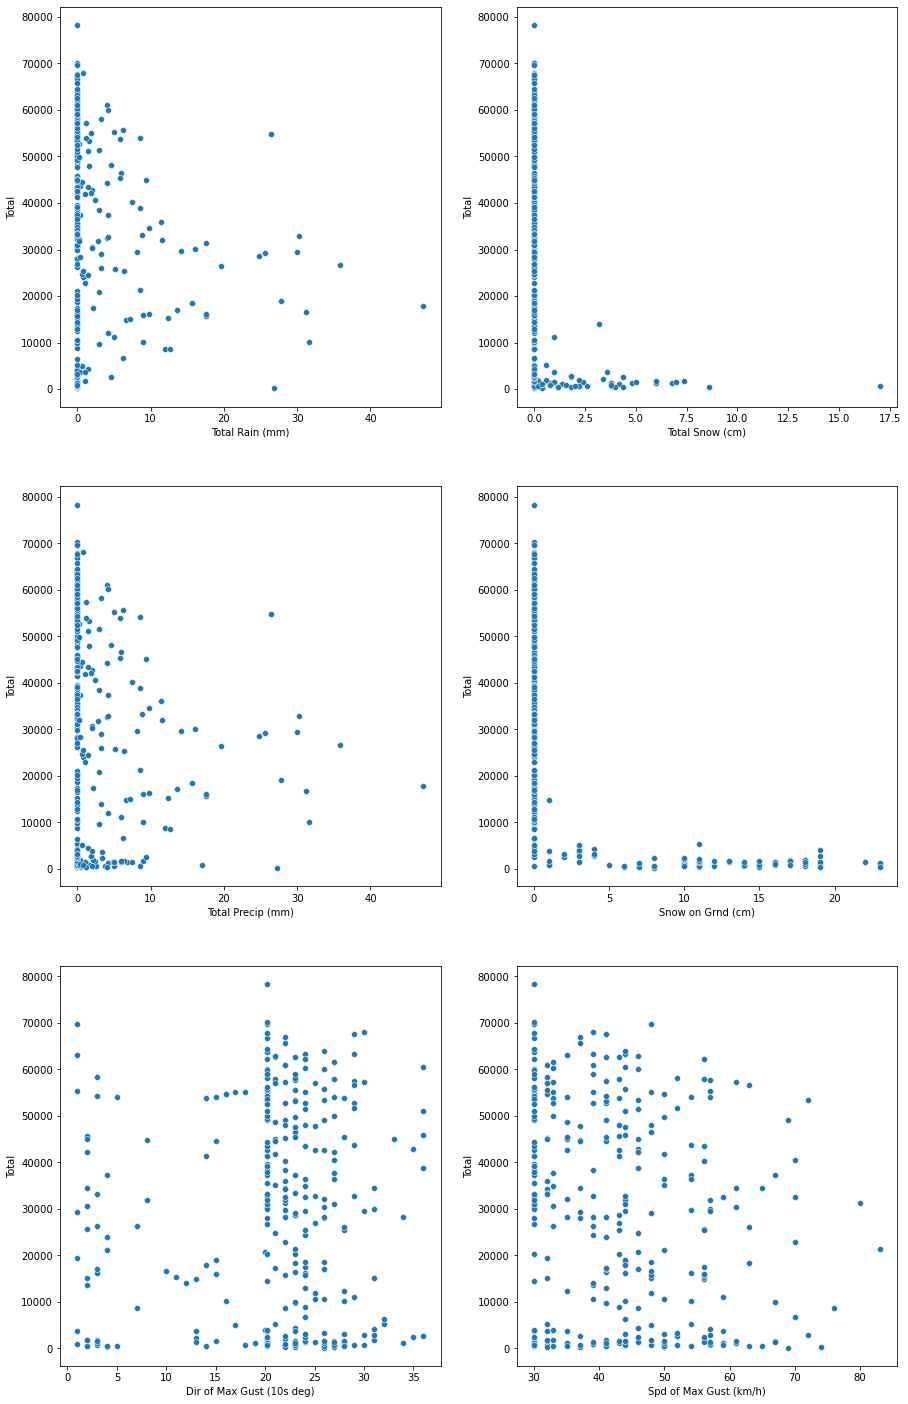

In [107]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,25))
for var, subplot in zip(c1, ax.flatten()):
    sns.scatterplot(df_num[var], df_num['Total'], ax = subplot)
plt.show()

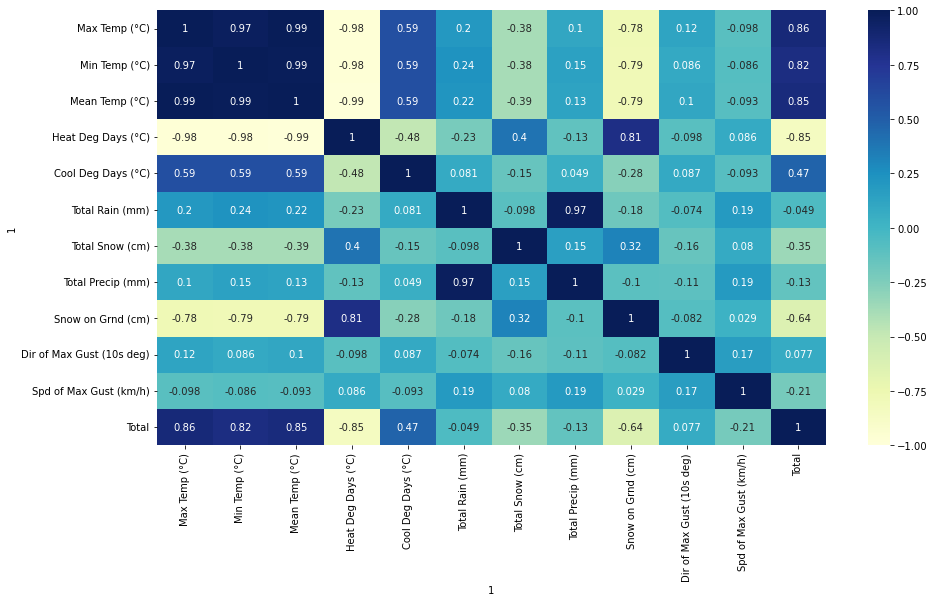

In [108]:
plt.rcParams["figure.figsize"] = [15,8]
sns.heatmap(df_num.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)
plt.show()


In [109]:

#High multicollinearity is observed among the features Min Temp, Max Temp, Mean Temp, and Heat Deg Days.
#Total rain and total precip are found to be positively corelated.

Scaling numerical features and encoding of categorical features

In [127]:

from sklearn.preprocessing import MinMaxScaler

Min_Max_scale = MinMaxScaler()

# fit the StandardScaler
for i in df_num.columns:
    df_num[i] = Min_Max_scale.fit_transform(df_num[[i]])

In [129]:
from sklearn.preprocessing import LabelEncoder

df_cat = df.select_dtypes(include=[object])

encode = LabelEncoder()

for i in df_cat.columns:
    df_cat[i] = encode.fit_transform(df_cat[[i]])
    


In [142]:
df_num.shape

(319, 12)

In [144]:
df_cat.shape

(319, 3)

In [145]:
dfn= pd.concat([df_num,df_cat],  axis=1)
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
1,,,,,,,,
Max Temp (°C),319.0,0.617318,0.269669,0.0,0.402390,0.693227,0.846614,1.0
Min Temp (°C),319.0,0.615124,0.270639,0.0,0.424089,0.674089,0.844130,1.0
Mean Temp (°C),319.0,0.601012,0.278497,0.0,0.387500,0.666667,0.837500,1.0
Heat Deg Days (°C),319.0,0.285500,0.316188,0.0,0.000000,0.177378,0.521851,1.0
Cool Deg Days (°C),319.0,0.115884,0.217583,0.0,0.000000,0.000000,0.142857,1.0
Total Rain (mm),319.0,0.053517,0.137662,0.0,0.000000,0.000000,0.021186,1.0
Total Snow (cm),319.0,0.026332,0.091871,0.0,0.000000,0.000000,0.000000,1.0
Total Precip (mm),311.0,0.062224,0.138196,0.0,0.000000,0.000000,0.061441,1.0
Snow on Grnd (cm),319.0,0.135750,0.260302,0.0,0.000000,0.000000,0.086957,1.0


In [146]:

dfn.shape


(319, 15)

# Long Short-Term Memory Model

The model is selected to give more weightage to the weather stats of recent days.

In [147]:



def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [148]:

reframed = series_to_supervised(dfn, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.298805   0.402834   0.325000   0.598972        0.0   0.000000   
2   0.290837   0.269231   0.252083   0.688946        0.0   0.000000   
3   0.189243   0.198381   0.162500   0.799486        0.0   0.000000   
4   0.418327   0.382591   0.377083   0.534704        0.0   0.567797   
5   0.252988   0.194332   0.193750   0.760925        0.0   0.000000   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...   var6(t)   var7(t)  \
1   0.105882   0.038136   0.000000    0.600000  ...  0.000000  0.000000   
2   0.000000   0.000000   0.043478    0.742857  ...  0.000000  1.000000   
3   1.000000   0.360169   0.043478    0.057143  ...  0.567797  0.023529   
4   0.023529   0.576271   0.347826    0.714286  ...  0.000000  0.000000   
5   0.000000   0.000000   0.260870    0.742857  ...  0.000000  0.129412   

    var8(t)   var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  \
1  0.000000  0.043478  0.742857  0.377358  0.00

In [149]:
reframed.shape

(302, 30)

 75% of observations are considered for training, i.e., 226 observations.

In [150]:
values = reframed.values

n_train_time = 226
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(226, 1, 29) (226,) (76, 1, 29) (76,)


In [151]:
from sklearn.metrics import mean_absolute_percentage_error

Epoch 1/500
15/15 - 5s - loss: 0.9259 - val_loss: 0.2046 - 5s/epoch - 320ms/step
Epoch 2/500
15/15 - 0s - loss: 0.2429 - val_loss: 0.1015 - 111ms/epoch - 7ms/step
Epoch 3/500
15/15 - 0s - loss: 0.1638 - val_loss: 0.0937 - 118ms/epoch - 8ms/step
Epoch 4/500
15/15 - 0s - loss: 0.1187 - val_loss: 0.0642 - 132ms/epoch - 9ms/step
Epoch 5/500
15/15 - 0s - loss: 0.1179 - val_loss: 0.0630 - 120ms/epoch - 8ms/step
Epoch 6/500
15/15 - 0s - loss: 0.1122 - val_loss: 0.0625 - 129ms/epoch - 9ms/step
Epoch 7/500
15/15 - 0s - loss: 0.1101 - val_loss: 0.0594 - 152ms/epoch - 10ms/step
Epoch 8/500
15/15 - 0s - loss: 0.1021 - val_loss: 0.0556 - 118ms/epoch - 8ms/step
Epoch 9/500
15/15 - 0s - loss: 0.0898 - val_loss: 0.0513 - 117ms/epoch - 8ms/step
Epoch 10/500
15/15 - 0s - loss: 0.0949 - val_loss: 0.0501 - 216ms/epoch - 14ms/step
Epoch 11/500
15/15 - 0s - loss: 0.0889 - val_loss: 0.0497 - 133ms/epoch - 9ms/step
Epoch 12/500
15/15 - 0s - loss: 0.0828 - val_loss: 0.0468 - 133ms/epoch - 9ms/step
Epoch 13/500

Epoch 100/500
15/15 - 0s - loss: 0.0296 - val_loss: 0.0087 - 121ms/epoch - 8ms/step
Epoch 101/500
15/15 - 0s - loss: 0.0228 - val_loss: 0.0099 - 125ms/epoch - 8ms/step
Epoch 102/500
15/15 - 0s - loss: 0.0262 - val_loss: 0.0066 - 132ms/epoch - 9ms/step
Epoch 103/500
15/15 - 0s - loss: 0.0247 - val_loss: 0.0074 - 183ms/epoch - 12ms/step
Epoch 104/500
15/15 - 0s - loss: 0.0246 - val_loss: 0.0082 - 117ms/epoch - 8ms/step
Epoch 105/500
15/15 - 0s - loss: 0.0250 - val_loss: 0.0066 - 118ms/epoch - 8ms/step
Epoch 106/500
15/15 - 0s - loss: 0.0258 - val_loss: 0.0096 - 196ms/epoch - 13ms/step
Epoch 107/500
15/15 - 0s - loss: 0.0248 - val_loss: 0.0072 - 123ms/epoch - 8ms/step
Epoch 108/500
15/15 - 0s - loss: 0.0212 - val_loss: 0.0072 - 106ms/epoch - 7ms/step
Epoch 109/500
15/15 - 0s - loss: 0.0222 - val_loss: 0.0101 - 184ms/epoch - 12ms/step
Epoch 110/500
15/15 - 0s - loss: 0.0255 - val_loss: 0.0105 - 147ms/epoch - 10ms/step
Epoch 111/500
15/15 - 0s - loss: 0.0276 - val_loss: 0.0086 - 179ms/epoch

Epoch 198/500
15/15 - 0s - loss: 0.0167 - val_loss: 0.0043 - 117ms/epoch - 8ms/step
Epoch 199/500
15/15 - 0s - loss: 0.0159 - val_loss: 0.0042 - 124ms/epoch - 8ms/step
Epoch 200/500
15/15 - 0s - loss: 0.0166 - val_loss: 0.0042 - 125ms/epoch - 8ms/step
Epoch 201/500
15/15 - 0s - loss: 0.0186 - val_loss: 0.0043 - 122ms/epoch - 8ms/step
Epoch 202/500
15/15 - 0s - loss: 0.0173 - val_loss: 0.0071 - 122ms/epoch - 8ms/step
Epoch 203/500
15/15 - 0s - loss: 0.0196 - val_loss: 0.0048 - 124ms/epoch - 8ms/step
Epoch 204/500
15/15 - 0s - loss: 0.0203 - val_loss: 0.0047 - 132ms/epoch - 9ms/step
Epoch 205/500
15/15 - 0s - loss: 0.0202 - val_loss: 0.0096 - 133ms/epoch - 9ms/step
Epoch 206/500
15/15 - 0s - loss: 0.0213 - val_loss: 0.0040 - 136ms/epoch - 9ms/step
Epoch 207/500
15/15 - 0s - loss: 0.0247 - val_loss: 0.0080 - 123ms/epoch - 8ms/step
Epoch 208/500
15/15 - 0s - loss: 0.0192 - val_loss: 0.0056 - 134ms/epoch - 9ms/step
Epoch 209/500
15/15 - 0s - loss: 0.0208 - val_loss: 0.0038 - 247ms/epoch - 1

Epoch 296/500
15/15 - 0s - loss: 0.0141 - val_loss: 0.0032 - 127ms/epoch - 8ms/step
Epoch 297/500
15/15 - 0s - loss: 0.0159 - val_loss: 0.0061 - 123ms/epoch - 8ms/step
Epoch 298/500
15/15 - 0s - loss: 0.0163 - val_loss: 0.0031 - 114ms/epoch - 8ms/step
Epoch 299/500
15/15 - 0s - loss: 0.0211 - val_loss: 0.0060 - 115ms/epoch - 8ms/step
Epoch 300/500
15/15 - 0s - loss: 0.0176 - val_loss: 0.0102 - 191ms/epoch - 13ms/step
Epoch 301/500
15/15 - 0s - loss: 0.0218 - val_loss: 0.0032 - 124ms/epoch - 8ms/step
Epoch 302/500
15/15 - 0s - loss: 0.0239 - val_loss: 0.0042 - 150ms/epoch - 10ms/step
Epoch 303/500
15/15 - 0s - loss: 0.0170 - val_loss: 0.0086 - 126ms/epoch - 8ms/step
Epoch 304/500
15/15 - 0s - loss: 0.0228 - val_loss: 0.0040 - 127ms/epoch - 8ms/step
Epoch 305/500
15/15 - 0s - loss: 0.0277 - val_loss: 0.0027 - 194ms/epoch - 13ms/step
Epoch 306/500
15/15 - 0s - loss: 0.0187 - val_loss: 0.0088 - 123ms/epoch - 8ms/step
Epoch 307/500
15/15 - 0s - loss: 0.0206 - val_loss: 0.0055 - 138ms/epoch 

15/15 - 0s - loss: 0.0147 - val_loss: 0.0016 - 206ms/epoch - 14ms/step
Epoch 394/500
15/15 - 0s - loss: 0.0165 - val_loss: 0.0019 - 145ms/epoch - 10ms/step
Epoch 395/500
15/15 - 0s - loss: 0.0165 - val_loss: 0.0042 - 139ms/epoch - 9ms/step
Epoch 396/500
15/15 - 0s - loss: 0.0142 - val_loss: 0.0023 - 153ms/epoch - 10ms/step
Epoch 397/500
15/15 - 0s - loss: 0.0117 - val_loss: 0.0022 - 200ms/epoch - 13ms/step
Epoch 398/500
15/15 - 0s - loss: 0.0098 - val_loss: 0.0016 - 124ms/epoch - 8ms/step
Epoch 399/500
15/15 - 0s - loss: 0.0121 - val_loss: 0.0022 - 115ms/epoch - 8ms/step
Epoch 400/500
15/15 - 0s - loss: 0.0127 - val_loss: 0.0038 - 124ms/epoch - 8ms/step
Epoch 401/500
15/15 - 0s - loss: 0.0123 - val_loss: 0.0015 - 117ms/epoch - 8ms/step
Epoch 402/500
15/15 - 0s - loss: 0.0123 - val_loss: 0.0016 - 127ms/epoch - 8ms/step
Epoch 403/500
15/15 - 0s - loss: 0.0124 - val_loss: 0.0046 - 114ms/epoch - 8ms/step
Epoch 404/500
15/15 - 0s - loss: 0.0133 - val_loss: 0.0016 - 146ms/epoch - 10ms/step
E

Epoch 491/500
15/15 - 0s - loss: 0.0105 - val_loss: 0.0011 - 120ms/epoch - 8ms/step
Epoch 492/500
15/15 - 0s - loss: 0.0089 - val_loss: 0.0023 - 122ms/epoch - 8ms/step
Epoch 493/500
15/15 - 0s - loss: 0.0097 - val_loss: 0.0020 - 185ms/epoch - 12ms/step
Epoch 494/500
15/15 - 0s - loss: 0.0096 - val_loss: 0.0033 - 132ms/epoch - 9ms/step
Epoch 495/500
15/15 - 0s - loss: 0.0119 - val_loss: 0.0010 - 124ms/epoch - 8ms/step
Epoch 496/500
15/15 - 0s - loss: 0.0122 - val_loss: 8.9224e-04 - 115ms/epoch - 8ms/step
Epoch 497/500
15/15 - 0s - loss: 0.0081 - val_loss: 0.0011 - 187ms/epoch - 12ms/step
Epoch 498/500
15/15 - 0s - loss: 0.0085 - val_loss: 0.0019 - 139ms/epoch - 9ms/step
Epoch 499/500
15/15 - 0s - loss: 0.0096 - val_loss: 0.0018 - 184ms/epoch - 12ms/step
Epoch 500/500
15/15 - 0s - loss: 0.0095 - val_loss: 0.0013 - 123ms/epoch - 8ms/step


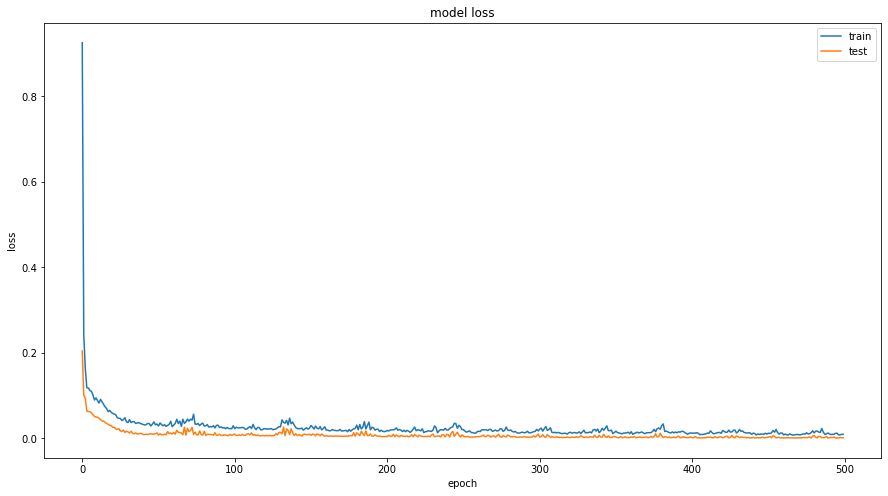

3/3 [==============================] - 1s 0s/step
Test MAPE: 0.025
Test RMSE: 2847.959


In [152]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=16, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 29))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = Min_Max_scale.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = Min_Max_scale.inverse_transform(inv_y)
inv_y = inv_y[:,0]

MAPE = mean_absolute_percentage_error(inv_y, inv_yhat)
print('Test MAPE: %.3f' % MAPE)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# Epochs and batch size are changed manually (Trial and error method). 
# For batch size of 16 and epochs of 500, the mean absolute percentage error is found to be 0.025.

# Testing on remaining Records (df2) of month November and December for which the count of rented cycles was not available in Dataset of Checpoint

In [185]:
df2 = weather.iloc[319:, :]

In [186]:
#Scaling and dummy encoding

df2_num = df2.select_dtypes(include=np.number)
df2_cat= df2.select_dtypes(include = [object])

for i in df2_num.columns:
    df2_num[i] = Min_Max_scale.transform(df2_num[[i]])
    
for i in df2_cat.columns:
    df2_cat[i] = encode.transform(df2_cat[[i]])

df2_test= pd.concat([df2_num,df2_cat],  axis=1)




In [187]:
df2_test.columns

Index(['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
       'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'Total',
       'Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag'],
      dtype='object', name=1)

In [182]:
#df2_test.drop('Total', axis=1, inplace = True)

In [188]:
reframed_df2 = series_to_supervised(df2_test, 1, 1)

In [189]:
reframed_df2.shape

(0, 30)

In [190]:
values = reframed_df2.values

test = values[:, :-1]


test= test.reshape((test.shape[0], 1, test.shape[1]))
print(test.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(0, 1, 29)


In [ ]:
#Prediction using trained model


yhat = model.predict(test)
test = test.reshape((test.shape[0], 29))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test[:, -6:]), axis=1)
inv_yhat = Min_Max_scale.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

inv_yhat